##        Exercise 14

In [56]:
import cv2
import os, sys
import numpy as np
import matplotlib.pyplot as plt

### Exercise 01 : 

In [57]:

# Open a file
path = "C:\\Users\\intel\\Music\\Filoger\\AI\\Exercise\\DIP\\images"
dirs = os.listdir( path )
print(dirs)
print('')

# This would print all the files and directories
for file in dirs:
    print (file) 


['a.jpg', 'b.jpg', 'c.jpg', 'd.png', 'e.jpg']

a.jpg
b.jpg
c.jpg
d.png
e.jpg


### Exercise 02 : 

In [58]:
def CheckForNums_ImageCanbeNeartoBinary(list1, val1, val2):
  
    for x in list1:
        if x < val1 or val2 < x:
            return True
    return False


In [59]:
def CheckFileType(img): # Color:3 , gray:2 , near binary:1 , -1:others

    count_Color = np.count_nonzero(np.unique(img)) 
    img_unique = np.unique(img)
    #print(count_Color)
    #print(img_unique)

    if(len(img.shape)<3):
        if count_Color <= 20 and CheckForNums_ImageCanbeNeartoBinary(img_unique, 10, 245): 
            return 1
        else:
            return 2
    elif len(img.shape)==3:     
        return 3
    else:
        return -1
    

In [61]:
for file in dirs:
    img = cv2.imread(r'images/' + file , cv2.IMREAD_UNCHANGED)
    print("image ", file ," shape is", img.shape)

    rslt = CheckFileType(img)
    if rslt == 1: 
        print('shape is gray and near to binary')
    elif rslt == 2:
        print ('shape is gray')
    elif rslt == 3:     
        print ('shape is Color(RGB)') 
    else:
        print ('shape is others')
    
    print('count of color in image is :' ,np.count_nonzero(np.unique(img)) )
    print(' ')

image  a.jpg  shape is (320, 480)
shape is gray and near to binary
count of color in image is : 16
 
image  b.jpg  shape is (320, 480, 3)
shape is Color(RGB)
count of color in image is : 255
 
image  c.jpg  shape is (512, 512)
shape is gray
count of color in image is : 255
 
image  d.png  shape is (316, 314)
shape is gray
count of color in image is : 47
 
image  e.jpg  shape is (600, 600)
shape is gray and near to binary
count of color in image is : 19
 


In [62]:
img = cv2.imread(r'images/' + 'e.jpg')
Y = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)[:,:,0]

# compute min and max of Y
min = np.min(Y)
max = np.max(Y)

# compute contrast
contrast = (max-min)/(max+min)
print('min val image matris : ' , min )
print( 'max val image matris : ' , max )
print( 'contrast is : ' , contrast)
print('shape is :'  , img.shape)

min val image matris :  0
max val image matris :  255
contrast is :  1.0
shape is : (600, 600, 3)


### Exercise 03 : 

In [71]:
def showWithAndWithoutContrast(img):
    plt.figure(figsize=(7, 7)) 

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2,2,1)
    plt.imshow(img)
    plt.title('original image')
    plt.axis('off')
    
    img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_grey2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.subplot(2,2,3)
    plt.imshow(img_grey2, cmap='gray')
    plt.title('gray image   BGR2GRAY')
    plt.axis('off')
    
    plt.subplot(2,2,4)
    plt.imshow(img_grey, cmap='gray')
    plt.title('gray image   RGB2GRAY')
    plt.axis('off')
     
    Max_Color_gray = np.max(np.unique(img_grey)) 
    img_grey_contrast = Max_Color_gray - img_grey
    
    plt.subplot(2,2,2)
    plt.imshow(img_grey_contrast, cmap='gray')
    plt.title('img_RGB2GRAY_contrast')
    plt.axis('off')
    

Shape of image   b.jpg   is (320, 480, 3) shape is Color(RGB)


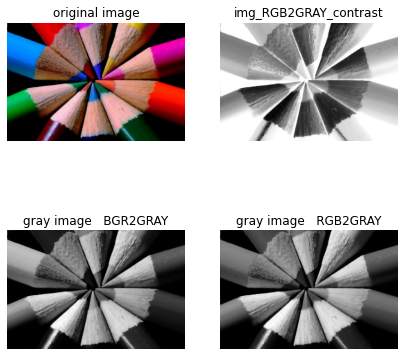

In [72]:
for file in dirs:
    img = cv2.imread(r'images/' + file , cv2.IMREAD_UNCHANGED)

    if len(img.shape)==3:     
        print("Shape of image  ", file ,"  is", img.shape,'shape is Color(RGB)')
    
        showWithAndWithoutContrast(img)


### Exercise 04 : 

 a.jpg
number of color in gray file : 
16
number of color in binary file : 
[  0 255]

 c.jpg
number of color in gray file : 
255
number of color in binary file : 
[  0 255]

 d.png
number of color in gray file : 
47
number of color in binary file : 
[  0 255]

 e.jpg
number of color in gray file : 
19
number of color in binary file : 
[  0 255]



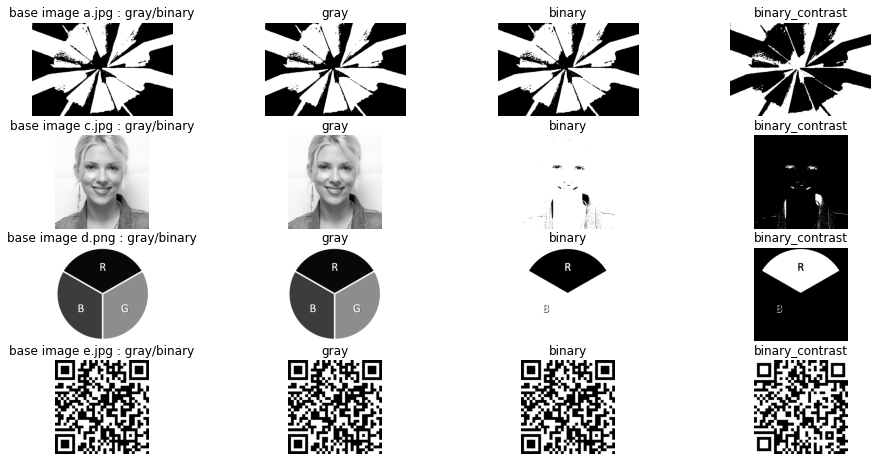

In [73]:
i = 1  
plt.figure(figsize=(16, 10)) 

for file in dirs:
    img = cv2.imread(r'images/' + file , cv2.IMREAD_UNCHANGED)
   
    if(len(img.shape) < 3):

        plt.subplot(5, 4, i)
        plt.imshow(img, cmap='gray')
        plt.title('base image ' + file +  ' : gray/binary')
        plt.axis('off')
        
        ret,thresh = cv2.threshold(img, 70, 255, cv2.THRESH_BINARY)
        i = i + 1 

        plt.subplot(5, 4, i)
        plt.imshow(img, cmap='gray')
        plt.title('gray')
        plt.axis('off')

        i = i + 1 

        plt.subplot(5, 4, i)
        plt.imshow(thresh, cmap='gray')
        plt.title('binary')
        plt.axis('off')

        i = i + 1 

        Max_thresh = np.max(np.unique(thresh)) 
        thresh_contrast = Max_thresh - thresh

        plt.subplot(5, 4, i)
        plt.imshow(thresh_contrast, cmap='gray')
        plt.title('binary_contrast')
        plt.axis('off')

        i = i + 1 
        
        print('', file)
        print('number of color in gray file : ')
        print(np.count_nonzero(np.unique(img)))
        print('number of color in binary file : ')
        print(np.unique(thresh))
        print('')

### Exercise 05 : 

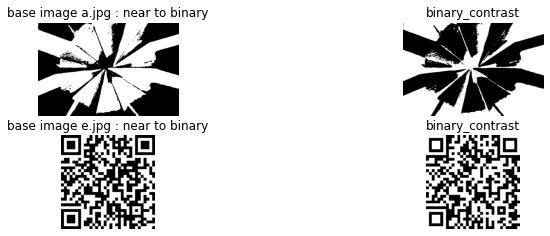

In [74]:
i = 1  
plt.figure(figsize=(12, 10)) 

for file in dirs:
    
    img = cv2.imread(r'images/' + file , cv2.IMREAD_UNCHANGED)
    rslt = CheckFileType(img)
    if rslt == 1: #near to binary

        plt.subplot(5, 2, i)
        plt.imshow(img, cmap='gray')
        plt.title('base image ' + file + ' : near to binary')
        plt.axis('off')
 
        i = i + 1 

        Max_thresh = np.max(np.unique(img)) 
        binary_contrast = Max_thresh - img

        plt.subplot(5, 2, i)
        plt.imshow(binary_contrast, cmap='gray')
        plt.title('binary_contrast')
        plt.axis('off')

        i = i + 1 
        

## Summary of the result : 

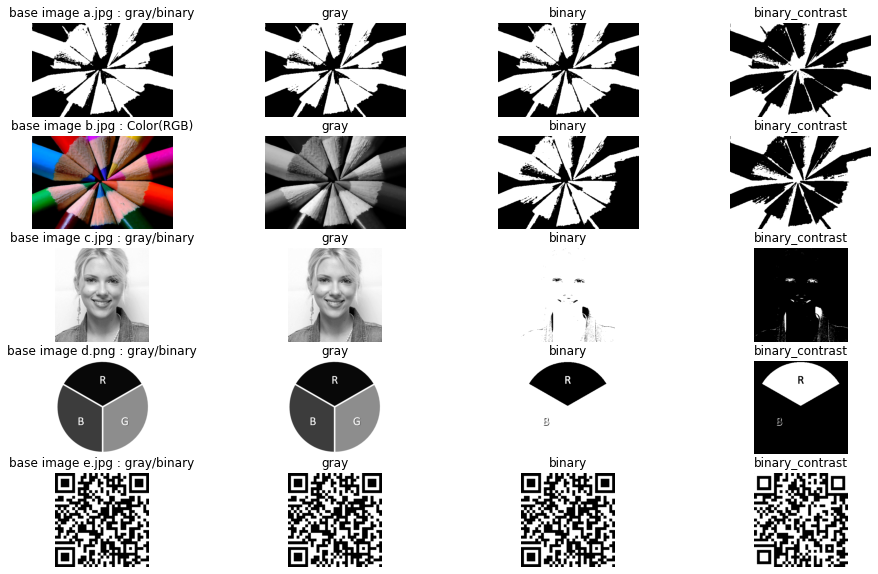

In [75]:
i = 1  
plt.figure(figsize=(16, 10)) 

for file in dirs:
    
    img = cv2.imread(r'images/' + file , cv2.IMREAD_UNCHANGED)
    img_Base = img
    msg = 'base image ' + file
    if(len(img.shape) < 3):
        msg += ' : gray/binary'

        plt.subplot(5, 4, i)
        plt.imshow(img_Base , cmap='gray')
        plt.title(msg)
        plt.axis('off')

    elif len(img.shape) == 3:     
        msg += ' : Color(RGB)' 
        img_Base  = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        plt.subplot(5, 4, i)
        plt.imshow(img_Base)
        plt.title(msg)
        plt.axis('off')
        
        img_Base  = cv2.cvtColor(img_Base , cv2.COLOR_BGR2GRAY)
    
    ret,thresh = cv2.threshold(img_Base, 70, 255, cv2.THRESH_BINARY)
 
    i = i + 1 
    
    plt.subplot(5, 4, i)
    plt.imshow(img_Base, cmap='gray')
    plt.title('gray')
    plt.axis('off')
    
    i = i + 1 
    
    plt.subplot(5, 4, i)
    plt.imshow(thresh, cmap='gray')
    plt.title('binary')
    plt.axis('off')
    
    i = i + 1 
    
    
    Max_thresh = np.max(np.unique(thresh)) 
    thresh_contrast = Max_thresh - thresh
    
    plt.subplot(5, 4, i)
    plt.imshow(thresh_contrast, cmap='gray')
    plt.title('binary_contrast')
    plt.axis('off')
    
    i = i + 1 